# Tugas 1 : Mengukur Jarak

Dissimiliarity Binary Symetric

Penambangan Data

Nama : Achmad Baharuddin Akbar

NIM  : 210411100001

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/achmadbaharuddinakbar/pendata/DataFile/ParisHousing.csv')
data

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [ ]:
data.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

**Seleksi Fitur**

In [ ]:
data[['hasYard', 'hasPool']].head(10)

,hasYard,hasPool
0,0,1
1,1,1
2,0,1
3,0,0
4,1,1
5,0,1
6,1,1
7,1,0
8,0,0
9,0,0


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

PROBALITY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [ ]:
def dissimilarity_dataset(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
dissimilarity_dataset(data, [1,2], ["hasYard", "hasPool"]).T

,1,2
hasYard,1.0,0.0
hasPool,1.0,1.0


In [ ]:
data.loc[0:4, ["hasYard", "hasPool"]]

,hasYard,hasPool
0,0,1
1,1,1
2,0,1
3,0,0
4,1,1


In [ ]:
def count_probality_value(data, start_index = 0, last_index = 1):

    PROBALITY_VALUE = {"q" : 0, "r" : 0, "s" : 0, "t" : 0}

    column_range = data.shape[1]

    for column in range(column_range):
        for value in PROBALITY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == PROBALITY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    PROBALITY_VALUE["q"] += 1
                if item[1] == "r":
                    PROBALITY_VALUE["r"] += 1
                if item[1] == "s":
                    PROBALITY_VALUE["s"] += 1
                if item[1] == "t":
                    PROBALITY_VALUE["t"] += 1

    return PROBALITY_VALUE

In [ ]:
# dimensi (1,2)
dimensi_1_2 = dissimilarity_dataset(data, [1,2], ["hasYard", "hasPool"])

In [ ]:
probality_d_1_2 = count_probality_value(dimensi_1_2, 1, 2)

In [ ]:
# dimensi (1,2)
dimensi_1_3 = dissimilarity_dataset(data, [1,3], ["hasYard", "hasPool"])

In [ ]:
probality_d_1_3 = count_probality_value(dimensi_1_3, 1, 3)

In [ ]:
# dimensi (1,2)
dimensi_1_4 = dissimilarity_dataset(data, [1,4], ["hasYard", "hasPool"])

In [ ]:
probality_d_1_4 = count_probality_value(dimensi_1_4, 1, 4)

**Dissimilarity Binary Symetric Value Formula**

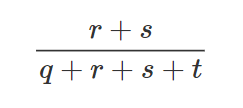

In [ ]:
def dissimilarity_binary_symetric_distance(probality_value):
    return (probality_value["r"] + probality_value["s"]) / (probality_value["q"] + probality_value["r"] + probality_value["s"] + probality_value["t"])

In [ ]:
dimensi_1_2 = dissimilarity_binary_symetric_distance(probality_d_1_2)
dimensi_1_3 = dissimilarity_binary_symetric_distance(probality_d_1_3)
dimensi_1_4 = dissimilarity_binary_symetric_distance(probality_d_1_4)

In [ ]:
#d1 dan d2

dimensi_1_2

0.5

In [ ]:
# d1 dan d4

dimensi_1_3

1.0

In [ ]:
# d1 dan d4

dimensi_1_4

0.0